# Install Jupyter Notebook
Use pip to install Jupyter Notebook. Example code cell:

!pip install notebook

In [ ]:
!pip install notebook

# Launch Jupyter Notebook Server
In the integrated terminal, run the command 'jupyter notebook' to start the server, which will open a browser window with the notebook interface.

In [2]:
# Launch Jupyter Notebook Server
# In the integrated terminal, run the following command to start the server:
!jupyter notebook

[I 2025-02-17 21:46:49.279 ServerApp] jupyter_lsp | extension was successfully linked.
[I 2025-02-17 21:46:49.281 ServerApp] jupyter_server_terminals | extension was successfully linked.
[I 2025-02-17 21:46:49.282 ServerApp] jupyterlab | extension was successfully linked.
[I 2025-02-17 21:46:49.283 ServerApp] notebook | extension was successfully linked.
[I 2025-02-17 21:46:49.356 ServerApp] notebook_shim | extension was successfully linked.
[I 2025-02-17 21:46:49.362 ServerApp] notebook_shim | extension was successfully loaded.
[I 2025-02-17 21:46:49.363 ServerApp] jupyter_lsp | extension was successfully loaded.
[I 2025-02-17 21:46:49.363 ServerApp] jupyter_server_terminals | extension was successfully loaded.
[I 2025-02-17 21:46:49.364 LabApp] JupyterLab extension loaded from /home/zano/Documents/TESI/TESI/venv/lib/python3.12/site-packages/jupyterlab
[I 2025-02-17 21:46:49.364 LabApp] JupyterLab application directory is /home/zano/Documents/TESI/TESI/venv/share/jupyter/lab
[I 2025-0

# Running Code Cells
Open your notebook in the browser and execute code cells interactively. This is similar to running cells in Visual Studio Code's Jupyter interface.

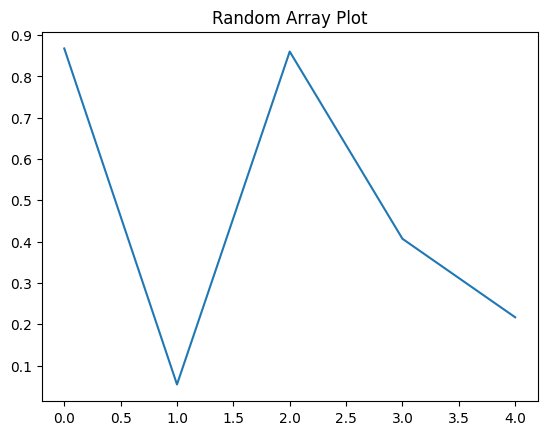

In [3]:
# Running Code Cells

# Open your notebook in the browser and execute code cells interactively.
# This is similar to running cells in Visual Studio Code's Jupyter interface.

# Example code cell to demonstrate running code interactively
import numpy as np

# Create a random array
random_array = np.random.rand(5)
random_array

# Example code cell to demonstrate plotting
import matplotlib.pyplot as plt

# Plot the random array
plt.plot(random_array)
plt.title('Random Array Plot')
plt.show()

# Displaying Interactive Visualizations
Run the interactive code snippet that creates a Plotly 3D scatter plot with a click callback. This cell demonstrates how to interact with visualizations and display outputs (such as images) using ipywidgets.

In [4]:
import plotly.graph_objects as go
import pandas as pd
import ipywidgets as widgets
from utils.data_visualization_functions import visualize_tiff

# Create a DataFrame that holds your metadata.
df = pd.DataFrame({
    'x': features_tsne[:, 0],
    'y': features_tsne[:, 1],
    'z': features_tsne[:, 2],
    'label': labels,
    'image_path': image_paths,  # full paths or names for your images
})

# Define a discrete color mapping for your classes.
color_map = {0: 'red', 1: 'blue'}
true_point_colors = [color_map[label] for label in df['label']]

# Create an interactive 3D scatter plot using Plotly FigureWidget.
fig = go.FigureWidget(data=[go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    mode='markers',
    marker=dict(
        size=5,
        color=true_point_colors  # manually assign colors for discrete labels
    ),
    # Save the image path in customdata to access in the callback.
    customdata=df['image_path'],
    # Set a hovertemplate to show the image path on hover.
    hovertemplate="Image: %{customdata}<extra></extra>"
)])
fig.update_layout(
    title='Interactive 3D t-SNE Visualization',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    ),
    width=800,  # Set the width (in pixels)
    height=600
)

# Create an Output widget to display messages and images.
output = widgets.Output()
display(output)

# Define the click callback function using the Output widget.
def click_fn(trace, points, state):
    if points.point_inds:
        idx = points.point_inds[0]
        image_path = trace.customdata[idx]
        with output:
            output.clear_output(wait=True)
            print("Clicked on image:", image_path)
            try:
                visualize_tiff(image_path)
            except Exception as e:
                print("Error displaying image:", e)

# Attach the callback to the scatter trace.
fig.data[0].on_click(click_fn)

# Display the interactive figure.
fig

ModuleNotFoundError: No module named 'utils'